In [1]:
import pandas as pd
from process_datas import get_X_y, scaler_data, encode_names


data = pd.read_csv('dataset-genres15.csv')
X, y, groups = get_X_y(data)
X = scaler_data(X)
y = encode_names(y)

In [2]:
from classifier import *


Xdf = pd.DataFrame(X)
ydf = pd.DataFrame(y)

keras = Keras()
_, _, _, history = keras.evaluate(Xdf, ydf, groups)

2022-06-21 23:43:10.212643: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-21 23:43:10.213414: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-21 23:43:10.243824: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1600)              32000     
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 800)               1280800   
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                6

2022-06-21 23:43:11.170741: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-21 23:43:11.189899: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1600000000 Hz


5/5 [==============================] - 1s 71ms/step - loss: 1.1805 - accuracy: 0.6600
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1600)              32000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 800)               1280800   
_________________________________________________________________
dropout_4 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
__________________________________

In [13]:
import matplotlib.pyplot as plt
from lc import plot_learning_curve


naive_bayer = GaussianNB()
id3 = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
svm = SVC(kernel='rbf', decision_function_shape='ovo', class_weight='balanced')

In [15]:
X_tr, y_tr = None, None

st = StratifiedShuffleSplit(n_splits=3)
splits = st.split(X, y, groups)

for train_idx, val_idx in splits:
    X_tr = Xdf.loc[train_idx]
    y_tr = ydf.loc[train_idx]
    
    X_val = Xdf.loc[val_idx]
    y_val = ydf.loc[val_idx]
    
    naive_bayer.fit(X_tr, y_tr)
    id3.fit(X_tr, y_tr)
    knn.fit(X_tr, y_tr)
    svm.fit(X_tr, y_tr)
    break

/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

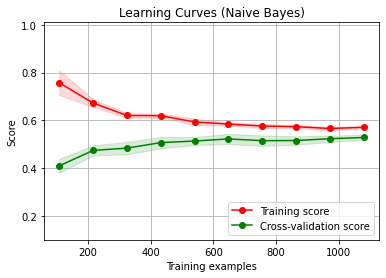

In [16]:
plot_learning_curve(naive_bayer, "Learning Curves (Naive Bayes)", X_tr, y_tr, ylim=(0.1, 1.01))
plt.show()

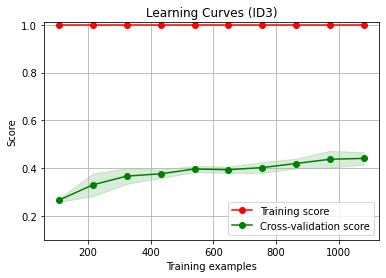

In [17]:
plot_learning_curve(id3, "Learning Curves (ID3)", X_tr, y_tr, ylim=(0.1, 1.01))
plt.show()

/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

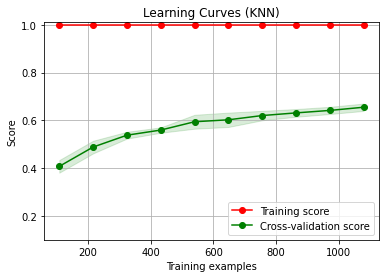

In [18]:
plot_learning_curve(knn, "Learning Curves (KNN)", X_tr, y_tr, ylim=(0.1, 1.01))
plt.show()

/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/grettel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

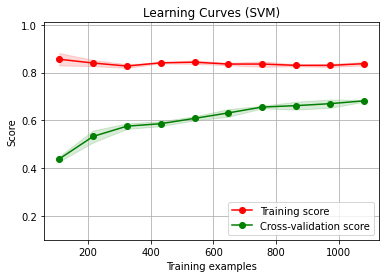

In [19]:
plot_learning_curve(svm, "Learning Curves (SVM)", X_tr, y_tr, ylim=(0.1, 1.01))
plt.show()

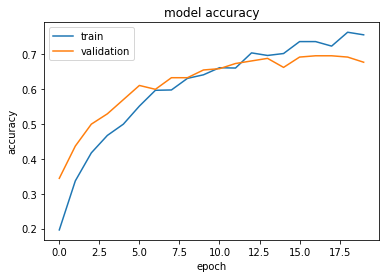

In [20]:
# Learning Curve Keras Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()
                

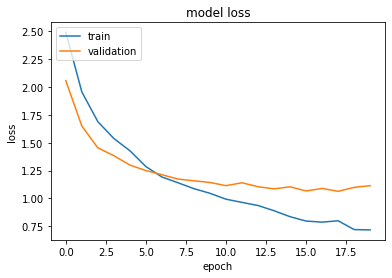

In [21]:
# Learning Curve Keras Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()